In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clients=pd.read_csv(r"C:\Users\shoum\OneDrive\Desktop\Augmedix\Ops Case Study Dataset - Sample EHR Data.csv")
normandy=pd.read_csv(r"C:\Users\shoum\OneDrive\Desktop\Augmedix\Ops Case Study Dataset - Sample DB Data.csv")

# Initial Exploration 

This section is for initial exploration of the data to find out basic discrepancies within the datasets. 

In [3]:
clients.head()

,Patient Name,Provider Name,Date of Service,CPT Code
0,Ava Johnson,Liam Young,09/24/2024,97010
1,Ava Johnson,Liam Young,09/24/2024,97140
2,Sophia King,Sebastian Miller,07/03/2024,97140
3,Carter Brown,Charlotte Williams,09/09/2024,97014
4,Olivia Davis,Noah Lee,09/09/2024,97140


In [4]:
normandy.head()

,Patient Name,Provider Name,from_date_range,cpt_codes
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}"
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}"
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}"
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}"
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}"


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25956 entries, 0 to 25955
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient Name     25956 non-null  object
 1   Provider Name    25954 non-null  object
 2   Date of Service  25954 non-null  object
 3   CPT Code         25954 non-null  object
dtypes: object(4)
memory usage: 811.3+ KB


In [6]:
clients.shape

(25956, 4)

In [7]:
clients.isnull().sum()

Patient Name       0
Provider Name      2
Date of Service    2
CPT Code           2
dtype: int64

In [8]:
clients_null=clients[clients.isnull().any(axis=1)]
clients_null

,Patient Name,Provider Name,Date of Service,CPT Code
25954,Scarlett Smith,NaN,NaN,NaN
25955,Scarlett Smith,NaN,NaN,NaN


In [9]:
clients.dtypes

Patient Name       object
Provider Name      object
Date of Service    object
CPT Code           object
dtype: object

In [10]:
normandy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient Name     6482 non-null   object
 1   Provider Name    6482 non-null   object
 2   from_date_range  6482 non-null   object
 3   cpt_codes        6482 non-null   object
dtypes: object(4)
memory usage: 202.7+ KB


In [11]:
normandy.dtypes

Patient Name       object
Provider Name      object
from_date_range    object
cpt_codes          object
dtype: object

In [12]:
clients.describe()

,Patient Name,Provider Name,Date of Service,CPT Code
count,25956,25954,25954,25954
unique,542,8,78,31
top,Mateo Lee,Aiden King,09/03/2024,97140
freq,250,8033,502,6370


In [13]:
normandy.describe()

,Patient Name,Provider Name,from_date_range,cpt_codes
count,6482,6482,6482,6482
unique,537,8,78,1187
top,Harper King,Aiden King,2024-09-03,"{97110,97112,97140}"
freq,54,1900,125,99


In [14]:
clients['Patient Name'].value_counts().head(20)

Patient Name
Mateo Lee            250
Aiden Clark          235
Sebastian Jackson    203
Layla Jackson        199
Harper King          196
Carter Brown         192
Zoey Davis           188
Liam Martinez        187
David Moore          174
Mateo Johnson        173
Aria Jackson         172
Noah Turner          159
Ethan Johnson        159
Carter Taylor        154
Layla Brown          154
Emma Martin          152
Olivia Perez         145
Lucas Lee            143
Scarlett Miller      142
Elijah Moore         141
Name: count, dtype: int64

In [15]:
clients['Patient Name'].value_counts().tail(20)

Patient Name
Layla Martin         4
Mason King           4
Mia Thomas           4
Lucas Moore          4
Mason Martin         4
Carter Davis         3
Scarlett Lopez       3
Carter Garcia        3
Sebastian Jones      3
Aria King            3
Lucas Anderson       3
Mia Jones            3
Scarlett Williams    3
Mateo Jones          3
Emma Brown           3
David Williams       3
Amelia Allen         2
Scarlett Jones       2
Olivia Allen         2
Harper Jones         1
Name: count, dtype: int64

In [16]:
normandy['Patient Name'].value_counts().head(20)

Patient Name
Harper King           54
Aiden Clark           52
Noah Turner           48
Liam Martinez         47
David Moore           47
Carter Brown          46
Layla Jackson         43
Mateo Johnson         43
Zoey Davis            41
Emma Martin           41
Charlotte King        40
Lucas Lee             40
Aria Jackson          37
Isabella Lopez        37
Aria Jones            36
Sebastian Martin      35
Scarlett Hernandez    34
Ethan Johnson         34
Isabella Gonzalez     34
Aria Taylor           34
Name: count, dtype: int64

In [17]:
normandy['Patient Name'].value_counts().tail(20)

Patient Name
Carter Davis         1
Julian Perez         1
Isabella Jackson     1
Carter Turner        1
Mia Lee              1
Mateo Wilson         1
Lucas Anderson       1
Aiden Davis          1
Scarlett Williams    1
Mia Jones            1
Lucas Moore          1
Carter Garcia        1
Ethan Miller         1
Mason Martin         1
Mia Thomas           1
Aria Martin          1
Amelia Allen         1
Zoey Jones           1
Olivia Allen         1
Ethan Smith          1
Name: count, dtype: int64

In [18]:
clients['Provider Name'].value_counts()

Provider Name
Aiden King            8033
Noah Lee              5786
Sebastian Miller      2631
Liam Young            2383
Charlotte Williams    2355
Sebastian Martinez    2050
Julian Lee            1713
Elijah Johnson        1003
Name: count, dtype: int64

In [19]:
normandy['Provider Name'].value_counts()

Provider Name
Aiden King            1900
Noah Lee              1499
Liam Young             612
Sebastian Miller       608
Charlotte Williams     584
Sebastian Martinez     561
Julian Lee             480
Elijah Johnson         238
Name: count, dtype: int64

# Standardization 

This section is for Standardization of both of the dataset so that comparison is possible and it becomes easier. 

In [20]:
clients.rename(columns={"CPT Code": "cpt_codes"}, inplace=True)

In [21]:
clients.head()

,Patient Name,Provider Name,Date of Service,cpt_codes
0,Ava Johnson,Liam Young,09/24/2024,97010
1,Ava Johnson,Liam Young,09/24/2024,97140
2,Sophia King,Sebastian Miller,07/03/2024,97140
3,Carter Brown,Charlotte Williams,09/09/2024,97014
4,Olivia Davis,Noah Lee,09/09/2024,97140


In [22]:
clients['Date of Service'] = pd.to_datetime(clients['Date of Service'])

In [23]:
normandy['from_date_range'] = pd.to_datetime(normandy['from_date_range'])

In [24]:
normandy.head()

,Patient Name,Provider Name,from_date_range,cpt_codes
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}"
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}"
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}"
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}"
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}"


In [25]:
clients.head()

,Patient Name,Provider Name,Date of Service,cpt_codes
0,Ava Johnson,Liam Young,2024-09-24,97010
1,Ava Johnson,Liam Young,2024-09-24,97140
2,Sophia King,Sebastian Miller,2024-07-03,97140
3,Carter Brown,Charlotte Williams,2024-09-09,97014
4,Olivia Davis,Noah Lee,2024-09-09,97140


In [26]:
clients.describe()

,Date of Service
count,25954
mean,2024-08-16 01:29:52.925946112
min,2024-07-01 00:00:00
25%,2024-07-24 00:00:00
50%,2024-08-16 00:00:00
75%,2024-09-09 00:00:00
max,2024-09-30 00:00:00


In [27]:
normandy.describe()

,from_date_range
count,6482
mean,2024-08-16 01:16:11.922246400
min,2024-07-01 00:00:00
25%,2024-07-24 00:00:00
50%,2024-08-16 00:00:00
75%,2024-09-09 00:00:00
max,2024-09-30 00:00:00


In [28]:
clients_grouped=clients.groupby(
    ['Patient Name', 'Provider Name', 'Date of Service']
)['cpt_codes'].apply(lambda x: set(x.dropna())).reset_index()

In [29]:
clients_grouped.head()

,Patient Name,Provider Name,Date of Service,cpt_codes
0,Aiden Allen,Aiden King,2024-07-03,{97113}
1,Aiden Allen,Aiden King,2024-07-10,{97113}
2,Aiden Allen,Aiden King,2024-07-15,{97113}
3,Aiden Allen,Aiden King,2024-07-24,{97113}
4,Aiden Allen,Aiden King,2024-07-31,{97113}


In [30]:
clients_grouped.tail()

,Patient Name,Provider Name,Date of Service,cpt_codes
6607,Zoey Young,Noah Lee,2024-09-05,"{97010, 97110, 97140}"
6608,Zoey Young,Noah Lee,2024-09-09,"{97010, 97110, 97112, 97140}"
6609,Zoey Young,Noah Lee,2024-09-11,"{97010, 97110, 97140}"
6610,Zoey Young,Noah Lee,2024-09-16,"{97010, 97110, 97140}"
6611,Zoey Young,Noah Lee,2024-09-18,"{97110, 97140, 97112, 97010, 97161}"


# Comaprison Between the Datasets

## Task 1: Identifying Missing Encounter

1. Compare the two datasets and identify which encounters from the Client
EHR Closed Encounters file are not found in the Imported Closed
Encounters file.
2. Provide a list of these missing encounters in the form of the unique ID
mentioned above (Patient Name, Date of Service, and Rendering Provider)

In [31]:
clients_grouped['Unique_ID']=clients_grouped['Patient Name'] + '|' + clients_grouped['Provider Name'] + '|' + clients_grouped['Date of Service'].astype(str)

In [32]:
normandy['Unique_ID']=normandy['Patient Name'] + '|' + normandy['Provider Name'] + '|' + normandy['from_date_range'].astype(str)

In [33]:
clients_grouped.head()

,Patient Name,Provider Name,Date of Service,cpt_codes,Unique_ID
0,Aiden Allen,Aiden King,2024-07-03,{97113},Aiden Allen|Aiden King|2024-07-03
1,Aiden Allen,Aiden King,2024-07-10,{97113},Aiden Allen|Aiden King|2024-07-10
2,Aiden Allen,Aiden King,2024-07-15,{97113},Aiden Allen|Aiden King|2024-07-15
3,Aiden Allen,Aiden King,2024-07-24,{97113},Aiden Allen|Aiden King|2024-07-24
4,Aiden Allen,Aiden King,2024-07-31,{97113},Aiden Allen|Aiden King|2024-07-31


In [34]:
normandy.head()

,Patient Name,Provider Name,from_date_range,cpt_codes,Unique_ID
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}",Lucas Smith|Aiden King|2024-07-03
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}",Lucas Smith|Charlotte Williams|2024-07-11
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}",Lucas Smith|Charlotte Williams|2024-07-17
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}",Lucas Smith|Julian Lee|2024-07-27
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}",Lucas Smith|Aiden King|2024-08-07


In [35]:
missing_encounter=clients_grouped[~clients_grouped['Unique_ID'].isin(normandy['Unique_ID'])]
missing_encounter

,Patient Name,Provider Name,Date of Service,cpt_codes,Unique_ID
6,Aiden Allen,Aiden King,2024-08-28,"{NORCM, 97113}",Aiden Allen|Aiden King|2024-08-28
7,Aiden Allen,Aiden King,2024-09-04,"{NORCM, 97113}",Aiden Allen|Aiden King|2024-09-04
8,Aiden Allen,Aiden King,2024-09-10,"{NORCM, 97010, 97113}",Aiden Allen|Aiden King|2024-09-10
9,Aiden Allen,Aiden King,2024-09-25,"{NORCM, 97113}",Aiden Allen|Aiden King|2024-09-25
28,Aiden Allen,Liam Young,2024-09-25,"{97010, 97110, 97140}",Aiden Allen|Liam Young|2024-09-25
...,...,...,...,...,...
6474,Zoey Martin,Aiden King,2024-07-29,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-07-29
6475,Zoey Martin,Aiden King,2024-08-15,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-08-15
6476,Zoey Martin,Aiden King,2024-09-30,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-09-30
6499,Zoey Perez,Charlotte Williams,2024-08-14,"{NORCM, 97162, 97140, 97110}",Zoey Perez|Charlotte Williams|2024-08-14


In [36]:
missing_encounter.shape

(282, 5)

In [37]:
missing_encounter.to_csv('missing_encounter.csv', index=False)

## Task 2: Investigating the Cause
1. Analyze the missing encounters and identify any patterns or reasons why
they might not have been imported into our database.
2. Summarize your findings and explain why certain encounters were not
imported.

In [38]:
missing_encounter.tail()

,Patient Name,Provider Name,Date of Service,cpt_codes,Unique_ID
6474,Zoey Martin,Aiden King,2024-07-29,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-07-29
6475,Zoey Martin,Aiden King,2024-08-15,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-08-15
6476,Zoey Martin,Aiden King,2024-09-30,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-09-30
6499,Zoey Perez,Charlotte Williams,2024-08-14,"{NORCM, 97162, 97140, 97110}",Zoey Perez|Charlotte Williams|2024-08-14
6500,Zoey Perez,Charlotte Williams,2024-08-21,"{NORCM, 97110, 97140}",Zoey Perez|Charlotte Williams|2024-08-21


In [39]:
missing_encounter['Patient Name'].value_counts()

Patient Name
Sebastian Jackson    27
Mateo Lee            24
Layla Brown          20
Carter Lee           15
Ava Hernandez        12
                     ..
Scarlett Miller       1
Sebastian Jones       1
Sophia Hernandez      1
Sophia Smith          1
Zoe Miller            1
Name: count, Length: 62, dtype: int64

In [40]:
missing_encounter['Provider Name'].value_counts()

Provider Name
Aiden King            95
Noah Lee              52
Sebastian Miller      37
Liam Young            36
Charlotte Williams    20
Sebastian Martinez    19
Julian Lee            13
Elijah Johnson        10
Name: count, dtype: int64

C:\Users\shoum\AppData\Local\Temp\ipykernel_8340\2532487580.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


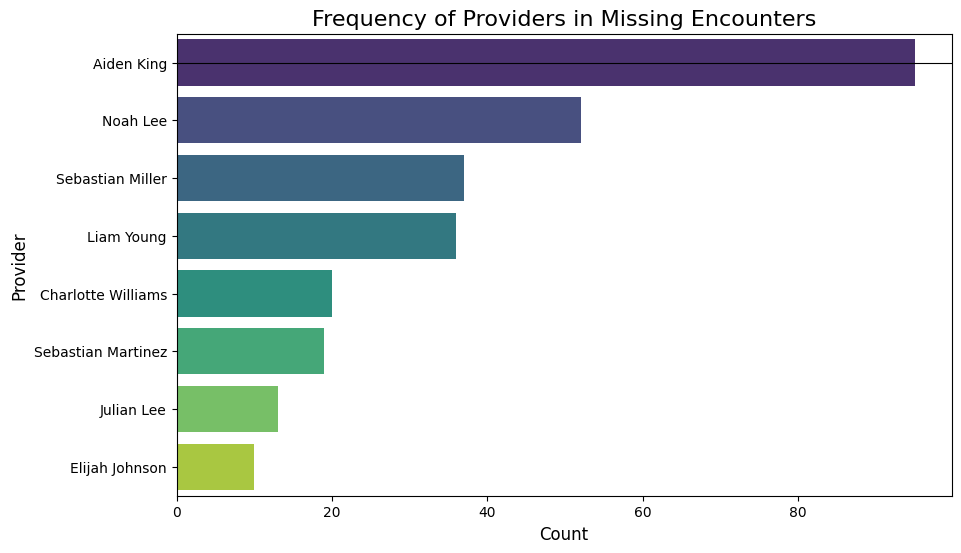

In [41]:
missing_cpt_counts = (
    missing_encounter['Provider Name']
    .explode()  
    .value_counts()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_cpt_counts.values, 
    y=missing_cpt_counts.index, 
    palette="viridis"
)
plt.title("Frequency of Providers in Missing Encounters", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Provider", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8)
plt.show()

In [42]:
missing_encounter['Date of Service'].value_counts()

Date of Service
2024-09-25    11
2024-09-06     8
2024-09-24     8
2024-07-18     8
2024-09-16     7
              ..
2024-09-12     1
2024-07-02     1
2024-07-12     1
2024-07-09     1
2024-07-19     1
Name: count, Length: 64, dtype: int64

In [43]:
missing_encounter['Date of Service'].dt.month.value_counts()

Date of Service
9    111
8    106
7     65
Name: count, dtype: int64

C:\Users\shoum\AppData\Local\Temp\ipykernel_8340\170793797.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_counts_df, x='Month', y='Count', palette='viridis')


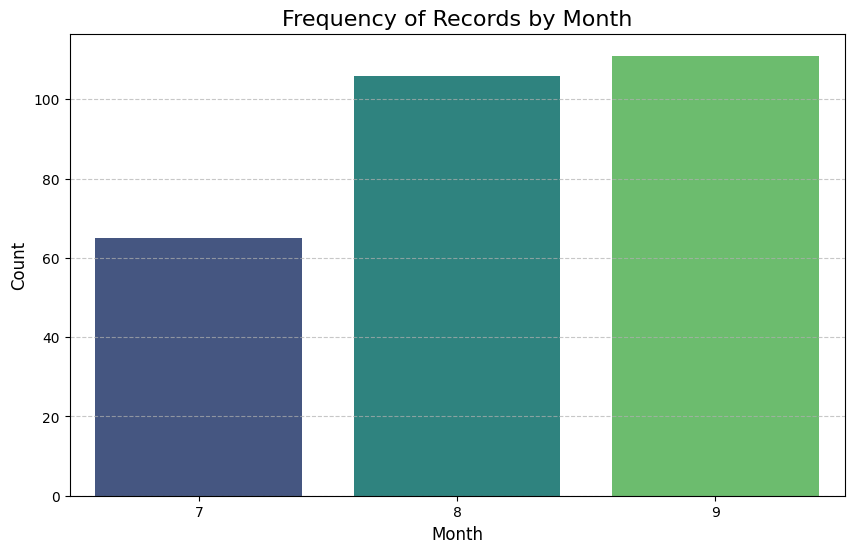

In [44]:
month_counts = missing_encounter['Date of Service'].dt.month.value_counts()

month_counts_df = month_counts.sort_index().reset_index()
month_counts_df.columns = ['Month', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=month_counts_df, x='Month', y='Count', palette='viridis')
plt.title("Frequency of Records by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
missing_encounter['Date of Service'].min()

Timestamp('2024-07-01 00:00:00')

In [46]:
missing_encounter['cpt_codes'].value_counts().head(50)

cpt_codes
{NORCM, 97014, 97110, TOS115, 97140, 97112, 97010}    27
{NORCM, SP, 97014, 97110, 97140, 97112, 97010}        24
{97010, 97110, 97112, 97140}                          21
{G0283, 97110, 97140, 97112, 97010}                   16
{NORCM, 97110, 97140, 97112, 97010}                   13
{NORCM, 97112, 97140}                                 11
{NORCM, sp90, 97110, 97140, 97112, 97010}             10
{NORCM, 97110, 97140}                                 10
{NORCM, sp90, 97014, 97110, 97140, 97112, 97010}      10
{97014, 97110, 97140, 97035, 97010}                    9
{NORCM, 97113}                                         8
{NORCM, 97110, 97010, 97140}                           7
{NORCM, 97110, 97140, 97112, 97035}                    7
{97014, 97110, 97140, 97112, 97010}                    7
{NORCM, 97140}                                         6
{NORCM, 97110, 97140, SP90, 97112}                     6
{NORCM, 97014, 97110, 97140, 97112, 97010}             5
{NORCM, 97110, 97112,

C:\Users\shoum\AppData\Local\Temp\ipykernel_8340\3021407007.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


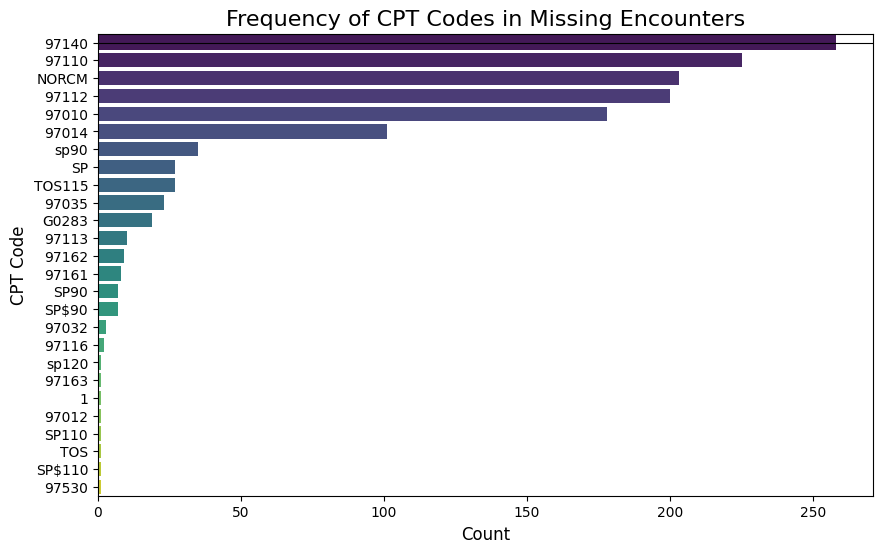

In [47]:
missing_cpt_counts = (
    missing_encounter["cpt_codes"]
    .explode()  
    .value_counts()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_cpt_counts.values, 
    y=missing_cpt_counts.index, 
    palette="viridis"
)
plt.title("Frequency of CPT Codes in Missing Encounters", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("CPT Code", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8)
plt.show()

In [48]:
v=clients[clients['cpt_codes']=='97140']
v

,Patient Name,Provider Name,Date of Service,cpt_codes
1,Ava Johnson,Liam Young,2024-09-24,97140
2,Sophia King,Sebastian Miller,2024-07-03,97140
4,Olivia Davis,Noah Lee,2024-09-09,97140
8,Noah Taylor,Julian Lee,2024-09-24,97140
19,Scarlett Clark,Aiden King,2024-09-03,97140
...,...,...,...,...
25945,Aria Smith,Aiden King,2024-08-01,97140
25946,Liam Garcia,Sebastian Miller,2024-09-09,97140
25949,Ava Jackson,Liam Young,2024-09-12,97140
25950,Noah King,Sebastian Miller,2024-09-12,97140


In [49]:
a=clients[clients['cpt_codes']=='97110']
a

,Patient Name,Provider Name,Date of Service,cpt_codes
5,Ava Martin,Aiden King,2024-08-27,97110
11,Mia Anderson,Aiden King,2024-09-13,97110
20,Isabella Martinez,Aiden King,2024-07-12,97110
37,Mason Williams,Aiden King,2024-08-13,97110
41,Ava Perez,Noah Lee,2024-07-01,97110
...,...,...,...,...
25933,David Allen,Aiden King,2024-09-04,97110
25940,Mason Smith,Julian Lee,2024-07-19,97110
25941,Liam Lopez,Noah Lee,2024-09-10,97110
25943,Emma King,Noah Lee,2024-09-26,97110


In [50]:
v=clients[clients['cpt_codes']=='NORCM']
v

,Patient Name,Provider Name,Date of Service,cpt_codes
152,Sebastian Jackson,Aiden King,2024-08-22,NORCM
236,Mia Brown,Julian Lee,2024-09-25,NORCM
244,Sebastian Jackson,Charlotte Williams,2024-09-23,NORCM
268,Zoey Perez,Charlotte Williams,2024-08-21,NORCM
279,Olivia Miller,Sebastian Miller,2024-07-08,NORCM
...,...,...,...,...
25443,Mateo Lee,Charlotte Williams,2024-09-23,NORCM
25445,Ethan Lopez,Sebastian Martinez,2024-08-12,NORCM
25594,Carter Jones,Julian Lee,2024-07-26,NORCM
25657,Mia Brown,Charlotte Williams,2024-09-19,NORCM


In [51]:
matches = missing_encounter[missing_encounter.apply(lambda row: row.astype(str).str.contains('NORCM', case=False, na=False).any(), axis=1)]
matches

,Patient Name,Provider Name,Date of Service,cpt_codes,Unique_ID
6,Aiden Allen,Aiden King,2024-08-28,"{NORCM, 97113}",Aiden Allen|Aiden King|2024-08-28
7,Aiden Allen,Aiden King,2024-09-04,"{NORCM, 97113}",Aiden Allen|Aiden King|2024-09-04
8,Aiden Allen,Aiden King,2024-09-10,"{NORCM, 97010, 97113}",Aiden Allen|Aiden King|2024-09-10
9,Aiden Allen,Aiden King,2024-09-25,"{NORCM, 97113}",Aiden Allen|Aiden King|2024-09-25
35,Aiden Allen,Noah Lee,2024-08-30,"{NORCM, 97010, 97140}",Aiden Allen|Noah Lee|2024-08-30
...,...,...,...,...,...
6474,Zoey Martin,Aiden King,2024-07-29,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-07-29
6475,Zoey Martin,Aiden King,2024-08-15,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-08-15
6476,Zoey Martin,Aiden King,2024-09-30,"{NORCM, sp90, 97140, 97112, 97010}",Zoey Martin|Aiden King|2024-09-30
6499,Zoey Perez,Charlotte Williams,2024-08-14,"{NORCM, 97162, 97140, 97110}",Zoey Perez|Charlotte Williams|2024-08-14


In [52]:
v=clients[(clients['cpt_codes']=='NORCM') & (clients['Provider Name']=='Aiden King')]
v

,Patient Name,Provider Name,Date of Service,cpt_codes
152,Sebastian Jackson,Aiden King,2024-08-22,NORCM
405,Aiden Allen,Aiden King,2024-09-04,NORCM
755,Olivia Lee,Aiden King,2024-08-23,NORCM
1059,Elijah Moore,Aiden King,2024-08-14,NORCM
1255,Olivia Perez,Aiden King,2024-08-27,NORCM
...,...,...,...,...
23199,Ethan Lopez,Aiden King,2024-07-18,NORCM
23367,Elijah Moore,Aiden King,2024-09-18,NORCM
24649,Elijah Moore,Aiden King,2024-08-07,NORCM
24713,Scarlett Johnson,Aiden King,2024-07-31,NORCM


In [53]:
c=clients[(clients['cpt_codes']=='NORCM') & (clients['Provider Name']=='Noah Lee')]
c.shape

(32, 4)

In [54]:
c=clients[(clients['cpt_codes']=='NORCM') & (clients['Provider Name']=='Sebastian Martinez')]
c.shape

(16, 4)

In [55]:
c=clients[(clients['cpt_codes']=='NORCM') & (clients['Provider Name']=='Julian Lee')]
c.shape

(12, 4)

In [56]:
c=clients[(clients['cpt_codes']=='NORCM') & (clients['Provider Name']=='Elijah Johnson')]
c.shape

(10, 4)

In [57]:
imported_encounter=clients_grouped[clients_grouped['Unique_ID'].isin(normandy['Unique_ID'])]

In [58]:
imported_encounter

,Patient Name,Provider Name,Date of Service,cpt_codes,Unique_ID
0,Aiden Allen,Aiden King,2024-07-03,{97113},Aiden Allen|Aiden King|2024-07-03
1,Aiden Allen,Aiden King,2024-07-10,{97113},Aiden Allen|Aiden King|2024-07-10
2,Aiden Allen,Aiden King,2024-07-15,{97113},Aiden Allen|Aiden King|2024-07-15
3,Aiden Allen,Aiden King,2024-07-24,{97113},Aiden Allen|Aiden King|2024-07-24
4,Aiden Allen,Aiden King,2024-07-31,{97113},Aiden Allen|Aiden King|2024-07-31
...,...,...,...,...,...
6607,Zoey Young,Noah Lee,2024-09-05,"{97010, 97110, 97140}",Zoey Young|Noah Lee|2024-09-05
6608,Zoey Young,Noah Lee,2024-09-09,"{97010, 97110, 97112, 97140}",Zoey Young|Noah Lee|2024-09-09
6609,Zoey Young,Noah Lee,2024-09-11,"{97010, 97110, 97140}",Zoey Young|Noah Lee|2024-09-11
6610,Zoey Young,Noah Lee,2024-09-16,"{97010, 97110, 97140}",Zoey Young|Noah Lee|2024-09-16


In [59]:
mat = imported_encounter[imported_encounter.apply(lambda row: row.astype(str).str.contains('NORCM', case=False, na=False).any(), axis=1)]
mat

,Patient Name,Provider Name,Date of Service,cpt_codes,Unique_ID
1018,Carter Jones,Aiden King,2024-07-22,"{NORCM, 97110, 97140, 97112, 97010}",Carter Jones|Aiden King|2024-07-22
3696,Liam King,Aiden King,2024-09-26,"{NORCM, 97014, 97110, 97140, 97112, 97010}",Liam King|Aiden King|2024-09-26
5149,Olivia Perez,Aiden King,2024-09-04,"{NORCM, sp90, 97110, 97140, 97112, 97010}",Olivia Perez|Aiden King|2024-09-04


In [60]:
mt = normandy[normandy.apply(lambda row: row.astype(str).str.contains('97140', case=False, na=False).any(), axis=1)]
mt

,Patient Name,Provider Name,from_date_range,cpt_codes,Unique_ID
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}",Lucas Smith|Aiden King|2024-07-03
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}",Lucas Smith|Charlotte Williams|2024-07-11
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}",Lucas Smith|Charlotte Williams|2024-07-17
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}",Lucas Smith|Julian Lee|2024-07-27
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}",Lucas Smith|Aiden King|2024-08-07
...,...,...,...,...,...
6477,Zoe Miller,Sebastian Martinez,2024-09-25,"{97010,97110,97014,97140}",Zoe Miller|Sebastian Martinez|2024-09-25
6478,Mateo Smith,Aiden King,2024-07-22,"{G0283,97161,97140,97010,97110}",Mateo Smith|Aiden King|2024-07-22
6479,Ava Davis,Charlotte Williams,2024-08-21,"{97010,97110,97162,97140}",Ava Davis|Charlotte Williams|2024-08-21
6480,Ava Davis,Noah Lee,2024-08-23,"{97140,97010}",Ava Davis|Noah Lee|2024-08-23


In [61]:
mt = normandy[normandy.apply(lambda row: row.astype(str).str.contains('97110', case=False, na=False).any(), axis=1)]
mt

,Patient Name,Provider Name,from_date_range,cpt_codes,Unique_ID
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}",Lucas Smith|Aiden King|2024-07-03
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}",Lucas Smith|Charlotte Williams|2024-07-11
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}",Lucas Smith|Charlotte Williams|2024-07-17
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}",Lucas Smith|Julian Lee|2024-07-27
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}",Lucas Smith|Aiden King|2024-08-07
...,...,...,...,...,...
6476,Zoe Miller,Aiden King,2024-09-23,"{97014,97140,97110,97010}",Zoe Miller|Aiden King|2024-09-23
6477,Zoe Miller,Sebastian Martinez,2024-09-25,"{97010,97110,97014,97140}",Zoe Miller|Sebastian Martinez|2024-09-25
6478,Mateo Smith,Aiden King,2024-07-22,"{G0283,97161,97140,97010,97110}",Mateo Smith|Aiden King|2024-07-22
6479,Ava Davis,Charlotte Williams,2024-08-21,"{97010,97110,97162,97140}",Ava Davis|Charlotte Williams|2024-08-21


In [62]:
mt = normandy[normandy.apply(lambda row: row.astype(str).str.contains('NORCM', case=False, na=False).any(), axis=1)]
mt

,Patient Name,Provider Name,from_date_range,cpt_codes,Unique_ID


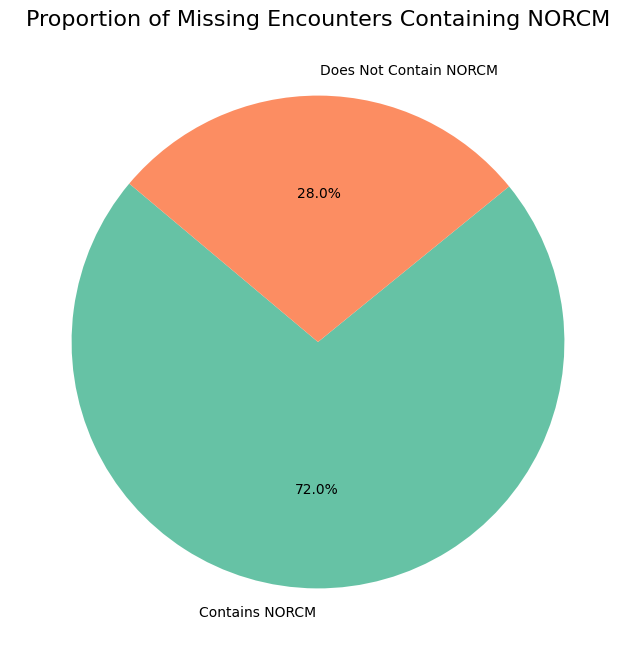

In [63]:
norcm_presence = missing_encounter['cpt_codes'].apply(lambda x: "NORCM" in x)
norcm_summary = norcm_presence.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    norcm_summary, 
    labels=['Contains NORCM', 'Does Not Contain NORCM'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=["#66c2a5", "#fc8d62"]
)
plt.title('Proportion of Missing Encounters Containing NORCM', fontsize=16)
plt.show()